In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [18]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


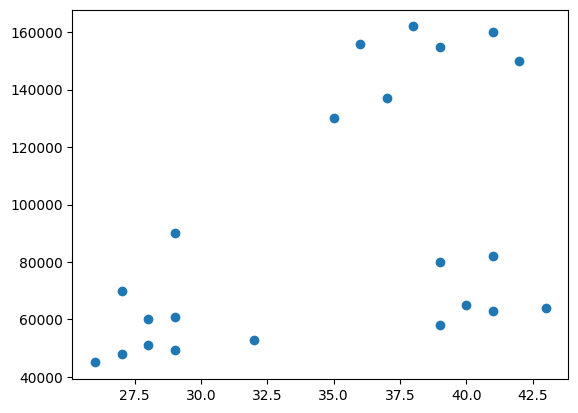

In [19]:
plt.scatter(df['Age'],df['Income($)'])

In [20]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [21]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


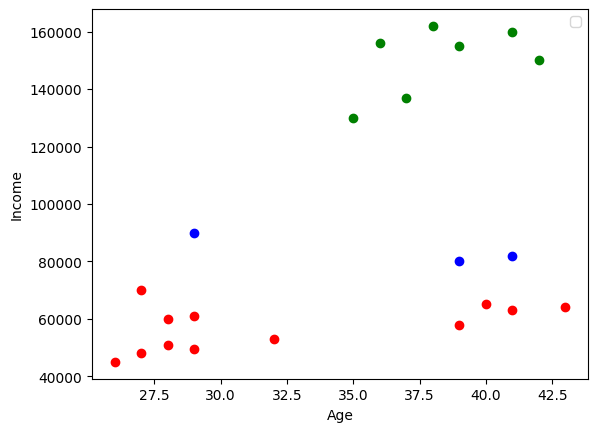

In [22]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.scatter(df3.Age,df3['Income($)'],color='blue')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [25]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [26]:
scalar = MinMaxScaler()
scalar.fit(df[['Age']])
df['Age']=scalar.transform(df[['Age']])

In [27]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [38]:
km = KMeans(n_clusters=3)
ypred = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


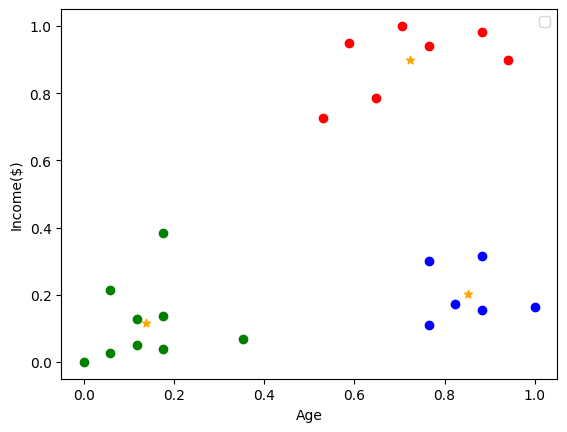

In [42]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange' , marker='*')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [39]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [48]:
k_range = range(1,23)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.21738833106132674,
 0.1735559655531264,
 0.16807803232846857,
 0.12394402484752351,
 0.09832326602244978,
 0.0615335967142225,
 0.05829670865308045,
 0.057541735115449355,
 0.04041959072198918,
 0.02336003499387405,
 0.0187087774868362,
 0.011033819491365383,
 0.007513957485122411,
 0.0054551225809321684,
 0.003578916064498534,
 0.0018122865807188413,
 0.0]

Text(0, 0.5, 'SSE')

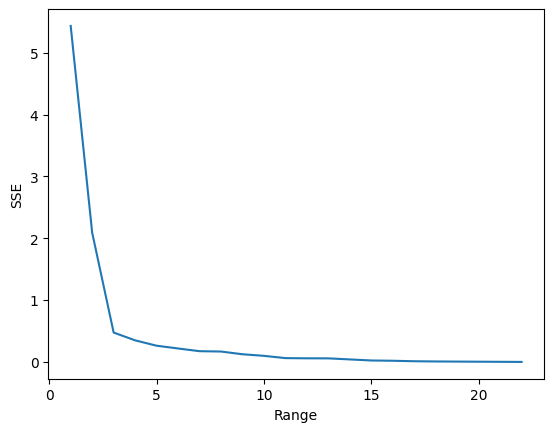

In [50]:
plt.plot(k_range,sse)
plt.xlabel('Range')
plt.ylabel('SSE')

In [57]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

sse

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553096,
 0.34910470944195654,
 0.336528430368078,
 0.2417481801197015,
 0.19522674746719498,
 0.16199189075190912,
 0.10188787724979426]

Text(0, 0.5, 'SSE')

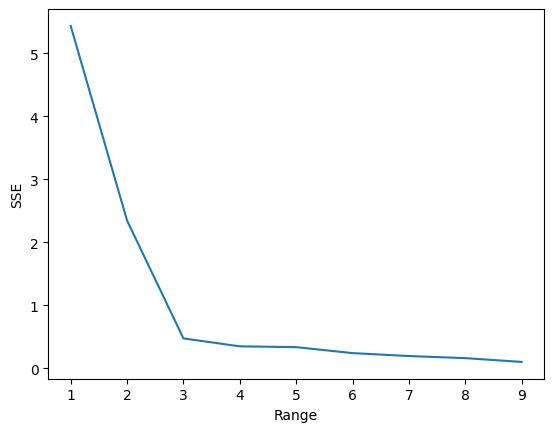

In [58]:
plt.plot(k_range,sse)
plt.xlabel('Range')
plt.ylabel('SSE')